In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
model = keras.models.load_model('dfd_testcode.keras')


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


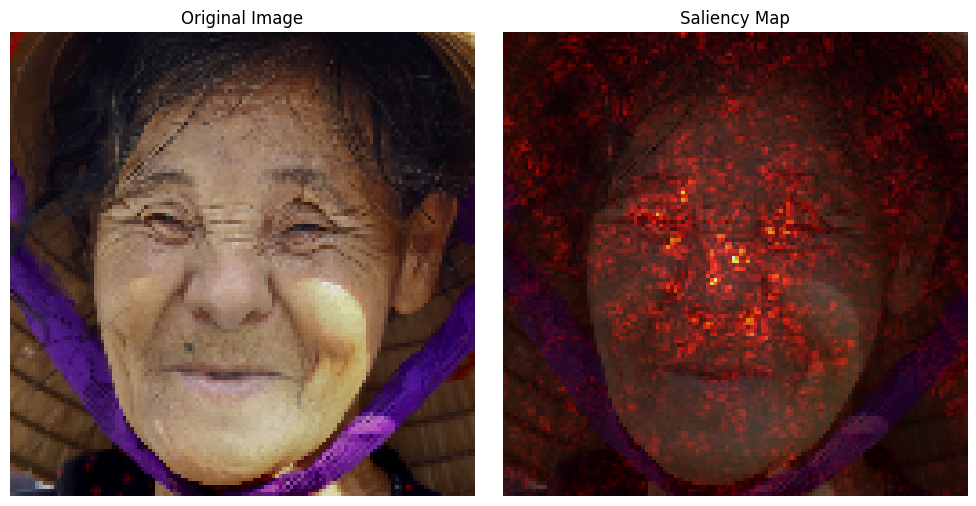

Predicted class: [0]
Predicted probabilities (yhat): [[0.4604573]]
Fake


In [12]:
# Load and preprocess the image
img_path = 'easy_119_0011.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to (128, 128)
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=-1)


# Define the image size (should match the size used during training)
IMAGE_SIZE = (128, 128)

# Load and preprocess the image
def preprocess_image(image_path, image_size):
    img = cv2.imread(image_path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, image_size)  # Resize to the input size
    img = img / 255.0  # Scale pixel values to [0, 1]
    return img

# Preprocess the image
input_image = preprocess_image(img_path, IMAGE_SIZE)

# Expand dimensions to match the model input shape
input_array = np.expand_dims(input_image, axis=0)

# Convert input array to TensorFlow tensor
input_tensor = tf.convert_to_tensor(input_array, dtype=tf.float32)

# Create Saliency Map
def compute_saliency_map(model, input_tensor):
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)  # Watch the input tensor
        predictions = model(input_tensor)  # Make predictions
        class_idx = tf.argmax(predictions[0])  # Get the predicted class
        loss = predictions[:, class_idx]  # Compute the loss for the predicted class

    # Calculate gradients of the loss w.r.t. the input
    grads = tape.gradient(loss, input_tensor)

    # Take the absolute maximum across the color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Normalize the saliency map to [0, 1]
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))
    return saliency

# Compute the saliency map
saliency_map = compute_saliency_map(model, input_tensor)

# Visualize the original image and saliency map
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

# Saliency map overlay
plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(saliency_map, cmap='hot', alpha=0.7)
plt.title("Saliency Map")
plt.axis("off")

plt.tight_layout()
plt.show()


print("Predicted class:", predicted_class)
print("Predicted probabilities (yhat):", predictions)

if predictions > 0.5:
    print("Real")
else:
    print("Fake")

